<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/FactorAnalysis_NihonSeaPacificSea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://cad.lolipop.jp/data/data_analyze_python/nihonsea-side-pacificsea-side-jan.csv

を読み込む

In [2]:
from google.colab import files
uploaded = files.upload()

Saving nihonsea-side-pacificsea-side-jan.csv to nihonsea-side-pacificsea-side-jan.csv


In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('nihonsea-side-pacificsea-side-jan.csv', encoding='SHIFT-JIS', header=1)

# 抜き出す
for a_column in ['秋田', '宮古', '酒田', '石巻', '新潟', '水戸', '銚子']:
  # それぞれ
  # 降水量の合計(mm),降水量の合計(mm),降水量の合計(mm),降水量の合計(mm), 日照時間(時間),日照時間(時間),日照時間(時間),日照時間(時間), 平均風速(m/s),平均風速(m/s),平均風速(m/s),平均蒸気圧(hPa),平均蒸気圧(hPa),平均蒸気圧(hPa),
  # で並んでいて，一つの地点につき，
  #	(空), 現象なし情報, 品質情報, 均質番号, (空), 現象なし情報, 品質情報, 均質番号, (空), 品質情報, 均質番号, (空), 品質情報, 均質番号
  # の(空)以外の場所が余計なので，削除
  for i in range(1, 14, 1):
    # 落とす列の列番号を指定(0~)
    if i in [1, 2, 3, 5, 6, 7, 9, 10, 12, 13]:
      df = df.drop(a_column + '.' + str(i), axis=1)

df = df.drop(1)

# DataFrameの中に欠損値がある場合は，0.0を代わりに入れておく
df = df.fillna(0)
df.head()

,Unnamed: 0,秋田,秋田.4,秋田.8,秋田.11,宮古,宮古.4,宮古.8,宮古.11,酒田,酒田.4,酒田.8,酒田.11,石巻,石巻.4,石巻.8,石巻.11,新潟,新潟.4,新潟.8,新潟.11,水戸,水戸.4,水戸.8,水戸.11,銚子,銚子.4,銚子.8,銚子.11
0,年月,降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa)
2,1977/1,51.0,72.6,4.4,3.6,6.0,224.3,2.1,2.8,101.0,68.9,4.7,3.9,3.0,203.0,2.3,3.4,151.5,69.6,4.9,4.5,13.0,196.6,1.9,4.0,75.5,150.0,4.0,5.0
3,1978/1,93.5,74.0,5.0,4.5,33.0,173.4,1.8,3.9,163.5,55.8,5.2,4.8,9.5,156.0,2.8,4.5,205.5,40.7,4.2,5.5,13.0,166.5,1.6,4.9,54.0,152.4,4.0,5.8
4,1979/1,113.5,70.7,3.1,4.8,74.0,164.0,1.7,3.9,201.0,63.1,4.8,5.4,32.5,177.5,2.8,4.9,151.5,79.9,3.4,6.2,62.0,194.0,1.3,5.1,79.5,180.5,3.3,6.3
5,1980/1,172.5,66.4,3.7,4.7,55.0,172.4,1.8,3.9,212.0,51.1,4.9,5.1,17.0,179.0,2.9,4.7,225.0,48.3,4.0,5.7,66.5,198.2,2.1,4.9,180.5,173.4,4.2,6.0


In [4]:
# グラフ表示するためにローマ字ラベルを作っておく
#np.arrayはenumerateでは回せないので，　listのままにしておく
city_label_list = (['Akita', 'Miyako', 'Sakata', 'Ishinomaki', 'Niigata', 'Mito', 'Choshi'])

# その要素の有無で0と1の2値で表現される変数を「ダミー変数」と呼ぶ
# 0, 1, 2, 3...などの状態が複数あり，かつその数字が大小の意味を持ってない場合は，カテゴリ変数と呼ぶ
# カテゴリ変数は判別問題などで扱えないので，
# カテゴリ変数で表現している内容を，要素に分けて，要素の有無で表現，つまり複数のダミー変数に直す

# 今回は太平洋側と日本海側の2値なので，ダミー変数：太平洋側が0, 日本海側が1
sea_side_label = np.array([1, 0, 1, 0, 1, 0, 0])

# 選んだ都市の
# average_wind_speed: 1月の平均風速
# daylight_hours: 1月の日照時間
# average_humidity: 1月の平均湿度
# precipitation: 1月の降水量
# として，それぞれ42年分*太平洋側，日本海側の2年ずつを，1つ配列としてくっつける

# 42年分のラベルを繋げておく　(42年分*全部の都市)
city_label_in_repeat = np.repeat(city_label_list, 42)
sea_side_label_in_repeat = np.repeat(sea_side_label, 42)

# データをつなげる
# まず最初に空の配列を作っておいて，
precipitation = np.array([], dtype=np.float)
daylight_hours = np.array([], dtype=np.float)
average_wind_speed = np.array([], dtype=np.float)
average_humidity = np.array([], dtype=np.float)

# 選んだ都市の，1月の平均風速，1月の日照時間，1月の平均湿度，1月の降水量を
# それぞれ1つの配列につなぐ
for i, a_city in enumerate(city_label_list): 
  precipitation = np.concatenate((precipitation, df.iloc[1:, 1+(i*4)]))
  daylight_hours = np.concatenate((daylight_hours, df.iloc[1:, 1+(i*4)+1]))
  average_wind_speed = np.concatenate((average_wind_speed, df.iloc[1:, 1+(i*4)+2]))
  average_humidity = np.concatenate((average_humidity, df.iloc[1:, 1+(i*4)+3]))

# vstackで重ねて，配列の次元を入れ替えて，DataFrameにしておく
df_sea_side_city = pd.DataFrame(np.vstack([city_label_in_repeat, sea_side_label_in_repeat, precipitation.astype(np.float), daylight_hours.astype(np.float), average_wind_speed.astype(np.float), average_humidity.astype(np.float)]).transpose())
# DataFrameの列名をつけておく
df_sea_side_city = df_sea_side_city.rename(columns={0:'都市名', 1:'太平洋側日本海側ダミー変数', 2:'1月の降水量', 3:'1月の日照時間', 4:'1月の平均風速', 5:'1月の平均湿度'})
# DataFrameの冒頭を確認
df_sea_side_city.head()

,都市名,太平洋側日本海側ダミー変数,1月の降水量,1月の日照時間,1月の平均風速,1月の平均湿度
0,Akita,1,51.0,72.6,4.4,3.6
1,Akita,1,93.5,74.0,5.0,4.5
2,Akita,1,113.5,70.7,3.1,4.8
3,Akita,1,172.5,66.4,3.7,4.7
4,Akita,1,64.5,58.8,4.6,4.2


In [6]:
!pip install factor-analyzer

     |████████████████████████████████| 40kB 3.2MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40382 sha256=e2d2f83454f30dd7bc3fc773e1191b992cd343cbb252905e66bbd40dbdcfa63d
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [19]:
# 因子分析
# 観測されたデータ（説明変数）が大量の次元を持ち，
# かつ説明変数感の相関係数が高い場合，
# 因果のルート側に数が少ない潜在変数Latent Variable（因子 Factor）が存在することにより，
# 観測データ = 説明変数が生み出されているという考え方

# 回帰や分類の前処理に使う場合の目的は，次元圧縮なので主成分分析と同じに思えるが，
# 因子分析は，観測データ（説明変数）を潜在変数の組み合わせによる合成量として捉え，その潜在変数を求める
# つまり考え方は主成分分析の逆である．

# 次元圧縮を目的としている場合，次元数を与えられるのは有利だが，
# 機械学習目的ではなく，分析目的の場合，
# 潜在変数の数，すなわち次元数を最初に与えなければならないことは，欠点でもある

# 次元圧縮した状態でグラフ等をみて，これは何の因子なのか，因子が妥当かどうか，を
# 分析者が検討しなければならい

from factor_analyzer import FactorAnalyzer
import seaborn as sns

# 何因子だと考えるか
n_factors=2

# promax回転法を使う
fa_model = FactorAnalyzer(n_factors=n_factors, rotation='promax', impute='drop')
fa_model.fit(df_sea_side_city.iloc[:, 2:])

# 因子負荷量はloadings_プロパティで読み出せるので，結果のDataFrameを作る
# わかりやすく列名を，元のデータフレームから持ってきて挿入する
# 0列目はラベルなので，1列目から
columns_name_array = df_sea_side_city.columns[2:]
print(columns_name_array)
# 行名(index)として，この配列を用いて，DataFrameを作る
df_result = pd.DataFrame(fa_model.loadings_, index=columns_name_array)

# 色分けして表示
cm = sns.light_palette('red', as_cmap=True)
# セルの最後に実行すること．df.head()と同じく，printしても色分けされない
df_result.style.background_gradient(cmap=cm)

Index(['1月の降水量', '1月の日照時間', '1月の平均風速', '1月の平均湿度'], dtype='object')


,0,1
1月の降水量,0.68527,0.174149
1月の日照時間,-1.11164,0.323405
1月の平均風速,0.543041,0.211808
1月の平均湿度,-0.0915565,1.03879


この結果を見る分には，因子１が日照時間と湿度に大きく影響を与えてるので，日本海側と太平洋側の違い……のように見える

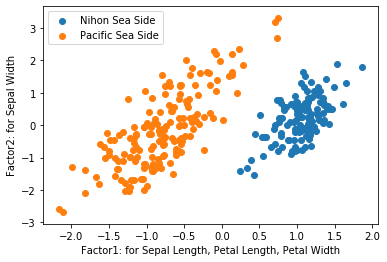

In [33]:
# 因子分析の結果を使って，
# 観測された元々の説明変数の値を潜在変数の値に変換する
factors_df = pd.DataFrame(fa_model.transform(df_sea_side_city.iloc[:, 2:]))
num_of_row = df_sea_side_city.values.shape[0]

# 潜在変数の値をプロットしてみる
# 日本海側と太平洋側にわけて
nihon_sea_side = list([])
pacific_sea_side = list([])
for i in range(num_of_row):
  if int(df_sea_side_city.values[i][1]) == 0:
    pacific_sea_side.append(factors_df.iloc[i, :])
  else:
    nihon_sea_side.append(factors_df.iloc[i, :])

factors_df_nihon_sea_side = pd.DataFrame(nihon_sea_side)
factors_df_pacific_sea_side = pd.DataFrame(pacific_sea_side)

import matplotlib.pyplot as plt

plt.scatter(factors_df_nihon_sea_side.iloc[:, 0], factors_df_nihon_sea_side.iloc[:, 1], label='Nihon Sea Side')
plt.scatter(factors_df_pacific_sea_side.iloc[:, 0], factors_df_pacific_sea_side.iloc[:, 1], label='Pacific Sea Side')

plt.xlabel('Factor1: for Sepal Length, Petal Length, Petal Width')
plt.ylabel('Factor2: for Sepal Width')
plt.legend()
plt.show()